In [10]:
%matplotlib inline
from clipper.src import CLIP_analysis
import HTSeq
import numpy as np
from gscripts.general import dataviz
from collections import Counter
import os
import seaborn as sns
img_dir = "."

In [2]:
!scp tscc-login.sdsc.edu:~/projects/fet_family/analysis/ad-hoc/TAF15_1.rep.sorted.filtered.bam .

TAF15_1.rep.sorted.filtered.bam               100%  983MB  41.0MB/s   00:24    


In [2]:
def get_bam_coverage_deletion(bamfile):
    """

    Given a bam file returns a properly covered htseq coverage file (this is slow)

    """
    all_cigops = Counter()
    bam = CLIP_analysis.Robust_BAM_Reader(bamfile)
    coverage = HTSeq.GenomicArray("auto", typecode="i", stranded=True)
    for read in bam:
        if read.aligned:
            for cigop in read.cigar:
                all_cigops[cigop.type] += 1
                if cigop.type != "D":
                    continue
                coverage[cigop.ref_iv] += 1
    return coverage, all_cigops

In [3]:
def get_bam_coverage(bamfile):
    """

    Given a bam file returns a properly covered htseq coverage file (this is slow)

    """
    all_cigops = Counter()
    bam = CLIP_analysis.Robust_BAM_Reader(bamfile)
    coverage = HTSeq.GenomicArray("auto", typecode="i", stranded=True)
    for read in bam:
        if read.aligned:
            for cigop in read.cigar:
                all_cigops[cigop.type] += 1
                if cigop.type != "M":
                    continue
                coverage[cigop.ref_iv] += 1
    return coverage, all_cigops

In [4]:
coverage, cigops = get_bam_coverage("/")
coverage_d, cigops = get_bam_coverage_deletion("TAF15_1.rep.sorted.filtered.only_u1.bam")

In [5]:
foo = coverage.chrom_vectors['U1']['+']
foo_d = coverage_d.chrom_vectors['U1']['+']

In [6]:
final_result = []
start = 0
end = 0
for step, count in list(foo.steps())[:-1]:
    start = min(step.start, start)
    end = max(step.end, end)
    final_result += [count] * (step.end - step.start)
    
final_result_d = []
start_d = 0
end_d = 0
for step, count in list(foo_d.steps())[:-1]:
    final_result_d += [count] * (step.end - step.start)
    start_d = min(step.start, start_d)
    end_d = max(step.end, end_d)

In [7]:
print len(np.arange(start_d, end_d))
print len(final_result_d)

570
570


In [8]:
final_result = np.array(final_result) + 1
final_result_d = np.array(final_result_d) + 1

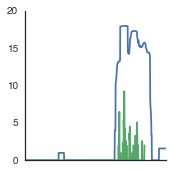

In [11]:
num_cols = 1
num_rows = 1
with dataviz.Figure(os.path.join(img_dir, "foo.svg"), figsize=(2.5 * num_cols,2.5*num_rows)) as fig:
    ax = fig.add_subplot(num_rows,num_cols,1)
    ax.plot(np.arange(start, end), np.log2(final_result))
    ax.plot(np.arange(start_d, end_d), np.log2(final_result_d))

    ax.set_xlim(start, end)
    ax.set_xticks([])
    sns.despine(ax=ax)
    